## Classificação do Dataset Flavia Leaf usando SVM

In [1]:
from numpy import array, cumsum
from pandas import read_csv
from matplotlib import pyplot as plt
from modules.dataset import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

Realizando a leitura do dataset a partir de um arquivo csv e criando o respectivo vetor de labels

In [2]:
dataset_flavia = read_csv("dataset_features.csv")
print(type(dataset_flavia))
print(dataset_flavia.head())

<class 'pandas.core.frame.DataFrame'>
    Arquivo      Área    Perímetro   Eixo Maior  Eixo Menor  Excentricidade  \
0  1001.jpg  198864.0  3488.450286  1563.713368  164.007374        0.994485   
1  1002.jpg  102116.0  2504.210245  1138.987993  115.058208        0.994885   
2  1003.jpg   87415.0  2301.440692  1049.594612  106.775515        0.994812   
3  1004.jpg  191411.0  2866.893578  1260.300089  197.112645        0.987694   
4  1005.jpg  229376.0  2929.248917  1213.008940  256.022020        0.977472   

    Solidez  Circularidade  Compacidade  Alongamento  Redondeza  Num Cantos  
0  0.980761       0.205353    61.194009     9.534409   0.103550           1  
1  0.973414       0.204627    61.411228     9.899233   0.100223           1  
2  0.974787       0.207394    60.591766     9.829918   0.101031           1  
3  0.976776       0.292653    42.939428     6.393806   0.153437           1  
4  0.957073       0.335927    37.408008     4.737909   0.198486           1  


In [3]:
labels, label_encoding = load_dataset_label_vector()

print(labels[0:5])
print(label_encoding)

[0, 0, 0, 0, 0]
['Pubescent Bamboo', 'Chinese Horse Chestnut', 'Chinese Redbud', 'True Indigo', 'Japanese Maple', 'Nanmu', 'Castor Aralia', 'Goldenrain Tree', 'Chinese Cinnamon', 'Anhui Barberry', 'Big-fruited Holly', 'Japanese Cheesewood', 'Wintersweet', 'Camphortree', 'Japan Arrowwood', 'Sweet Osmanthus', 'Deodar', 'Maidenhair Tree', 'Crape Myrtle', 'Oleander', 'Yew Plum Pine', 'Japanese Flowering Cherry', 'Glossy Privet', 'Chinese Toon', 'Peach', 'Ford Woodlotus', 'Trident Maple', 'Beales Barberry', 'Southern Magnolia', 'Canadian Poplar', 'Chinese Tulip Tree', 'Tangerine']


Ajustando dataset e labels para PCA e Treinamentos

In [4]:
X = dataset_flavia.iloc[:,1:]
Y = array(labels)

print(X.head())
print(Y[0:5])

       Área    Perímetro   Eixo Maior  Eixo Menor  Excentricidade   Solidez  \
0  198864.0  3488.450286  1563.713368  164.007374        0.994485  0.980761   
1  102116.0  2504.210245  1138.987993  115.058208        0.994885  0.973414   
2   87415.0  2301.440692  1049.594612  106.775515        0.994812  0.974787   
3  191411.0  2866.893578  1260.300089  197.112645        0.987694  0.976776   
4  229376.0  2929.248917  1213.008940  256.022020        0.977472  0.957073   

   Circularidade  Compacidade  Alongamento  Redondeza  Num Cantos  
0       0.205353    61.194009     9.534409   0.103550           1  
1       0.204627    61.411228     9.899233   0.100223           1  
2       0.207394    60.591766     9.829918   0.101031           1  
3       0.292653    42.939428     6.393806   0.153437           1  
4       0.335927    37.408008     4.737909   0.198486           1  
[0 0 0 0 0]


Normalização do Dataset

In [5]:
x_scaler = StandardScaler()

x_fit = x_scaler.fit_transform(X)

print(x_fit[0:2])

[[-1.63332901 -0.58331777  0.82131088 -1.75648155  0.90364234  0.51025046
  -1.6682654   0.58097906  0.72214528 -1.60369205 -0.41120488]
 [-2.01538668 -2.0830318  -0.84969034 -1.94482763  0.90558647  0.44277689
  -1.67217469  0.58591142  0.77039669 -1.61837071 -0.41120488]]


Divisão e treinamento sem PCA

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x_fit, Y, test_size=0.3, random_state=42, stratify=Y
)

kernels = ["linear","rbf"]

for kernel in kernels:
    svc_raw = SVC(kernel=kernel)
    svc_raw.fit(x_train,y_train)

    y_pred = svc_raw.predict(x_test)

    accuracy_raw = accuracy_score(y_test,y_pred)

    print(f"Acurácia sem PCA e kernel {kernel}: {accuracy_raw}")
    print(f"Métricas sem PCA e kernel {kernel}:\n{classification_report(y_test,y_pred)}")

Acurácia sem PCA e kernel linear: 0.7242582897033158
Métricas sem PCA e kernel linear:
              precision    recall  f1-score   support

           0       0.50      0.28      0.36        18
           1       0.30      0.32      0.31        19
           2       0.88      0.95      0.91        22
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        17
           5       0.64      0.74      0.68        19
           6       1.00      0.81      0.90        16
           7       1.00      1.00      1.00        18
           8       0.45      0.31      0.37        16
           9       0.68      1.00      0.81        19
          10       0.47      0.47      0.47        15
          11       0.85      0.58      0.69        19
          12       0.69      0.69      0.69        16
          13       0.53      0.42      0.47        19
          14       0.29      0.22      0.25        18
          15       0.50      0.24      0.32     

Aplicando PCA para reduzir 8 componentes

In [11]:
pca = PCA(n_components=8)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

for kernel in kernels:
    svc_pca = SVC(kernel=kernel)
    svc_pca.fit(x_train_pca, y_train)
    y_pred_pca = svc_pca.predict(x_test_pca)

    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    print(f"Acurácia com PCA e kernel {kernel}: {accuracy_pca}")
    print(f"Métricas com PCA e kernel {kernel}:\n{classification_report(y_test,y_pred)}")

Acurácia com PCA e kernel linear: 0.7260034904013961
Métricas com PCA e kernel linear:
              precision    recall  f1-score   support

           0       0.57      0.22      0.32        18
           1       0.47      0.47      0.47        19
           2       0.84      0.95      0.89        22
           3       1.00      0.95      0.98        22
           4       1.00      1.00      1.00        17
           5       0.46      0.68      0.55        19
           6       1.00      0.88      0.93        16
           7       1.00      1.00      1.00        18
           8       0.29      0.12      0.17        16
           9       0.60      0.95      0.73        19
          10       0.44      0.27      0.33        15
          11       0.61      0.58      0.59        19
          12       0.38      0.19      0.25        16
          13       0.45      0.47      0.46        19
          14       0.21      0.17      0.19        18
          15       0.25      0.06      0.10     

Verificando o impacto da redução de componentes na acurácia

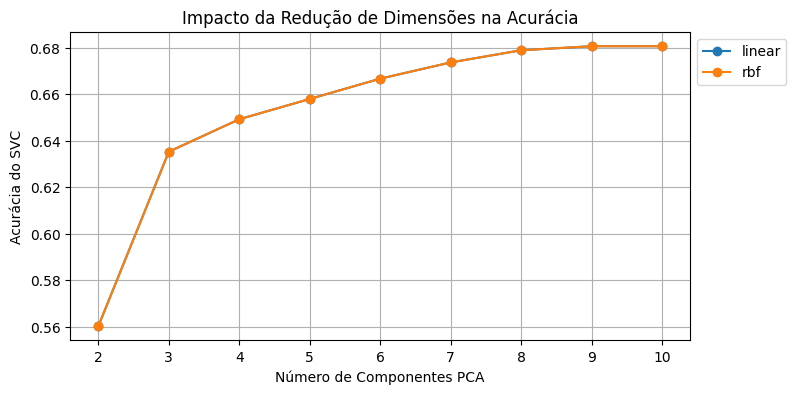

In [14]:
accuracies = {}
components = range(2, 11)

for kernel in kernels:
    results=[]
    for n in components:
        pca = PCA(n_components=n)
        X_train_p = pca.fit_transform(x_train)
        X_test_p = pca.transform(x_test)

        svc = SVC()
        svc.fit(X_train_p, y_train)
        y_pred_p = svc.predict(X_test_p)

        results.append(accuracy_score(y_test, y_pred_p))
    accuracies[kernel]=results

plt.figure(figsize=(8,4))
for kernel, result in accuracies.items():
    plt.plot(components, result, marker='o',label=str(kernel))
plt.xlabel('Número de Componentes PCA')
plt.ylabel('Acurácia do SVC')
plt.title('Impacto da Redução de Dimensões na Acurácia')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()